# Install the necessary packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import you data and perform basic data exploration phase

In [3]:
df = pd.read_csv('/Users/mohamoud/Desktop/streamlit/expresso_churn_project/data/Expresso_churn_dataset.csv')
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


## Display general information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


## Handle Missing and corrupted values

In [5]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [6]:
# Drop columns with very high missing values or low correlation
df.drop(columns=["ZONE1", "ZONE2", "TIGO", "user_id"], inplace=True)

# Drop the row with missing CHURN
df = df.dropna(subset=["CHURN"])

In [7]:
# Impute numeric features with median
numerical_impute_median = [
    "MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT",
    "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE"
]

for col in numerical_impute_median:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

/var/folders/_3/2nrfy44x28j0rq_2lk2456cm0000gn/T/ipykernel_2268/1768508691.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/var/folders/_3/2nrfy44x28j0rq_2lk2456cm0000gn/T/ipykernel_2268/1768508691.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [8]:
# Impute categorical features with 'Unknown'
categorical_impute_unknown = ["REGION", "TOP_PACK"]
for col in categorical_impute_unknown:
    df[col].fillna("Unknown", inplace=True)

# Impute FREQ_TOP_PACK with 0 (indicates no usage)
df["FREQ_TOP_PACK"].fillna(0, inplace=True)

# Final check on remaining missing values
print("Remaining nulls:")
print(df.isnull().sum())

/var/folders/_3/2nrfy44x28j0rq_2lk2456cm0000gn/T/ipykernel_2268/108313442.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/var/folders/_3/2nrfy44x28j0rq_2lk2456cm0000gn/T/ipykernel_2268/108313442.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

Remaining nulls:
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64


In [9]:
# save cleaned dataset
df.to_csv("/Users/mohamoud/Desktop/streamlit/expresso_churn_project/data/expresso_churn_clean.csv", index=False)

## Remove duplicates, if they exist

In [10]:
df.duplicated().sum()

np.int64(650557)

In [11]:
# removing duplicates from our dataset
df.drop_duplicates()

# checking the new shape of our dataset
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (2154048, 15)


## Handle outliers, if they exist

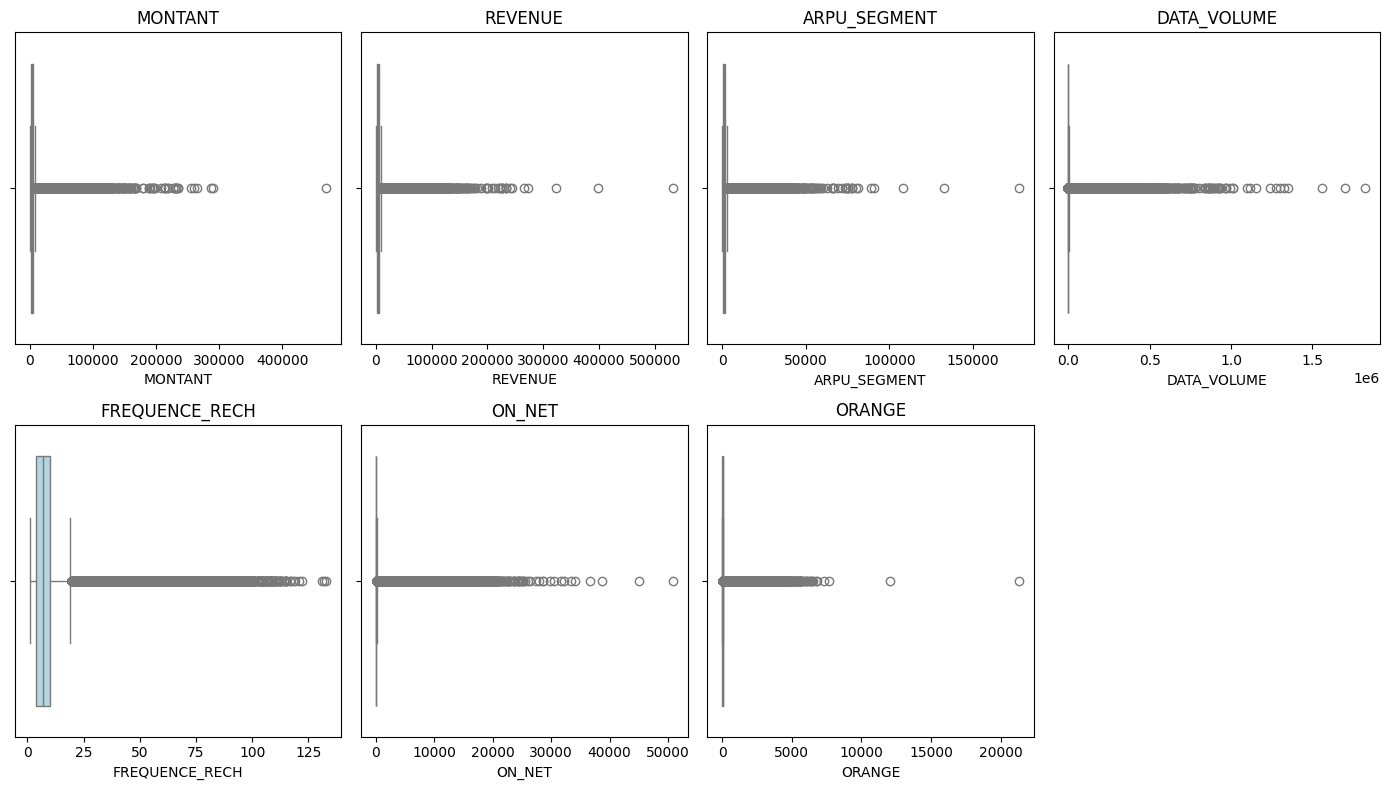

In [12]:
# visualizing key features using Boxplots
num_cols = ["MONTANT", "REVENUE", "ARPU_SEGMENT", "DATA_VOLUME", "FREQUENCE_RECH", "ON_NET", "ORANGE"]

plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
# applying IQR based filtering 
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_cap, upper=upper_cap)
    return df

# Apply to selected columns
outlier_cols = ["MONTANT", "REVENUE", "ARPU_SEGMENT", "DATA_VOLUME", "FREQUENCE_RECH", "ON_NET", "ORANGE"]
for col in outlier_cols:
    df = cap_outliers(df, col)

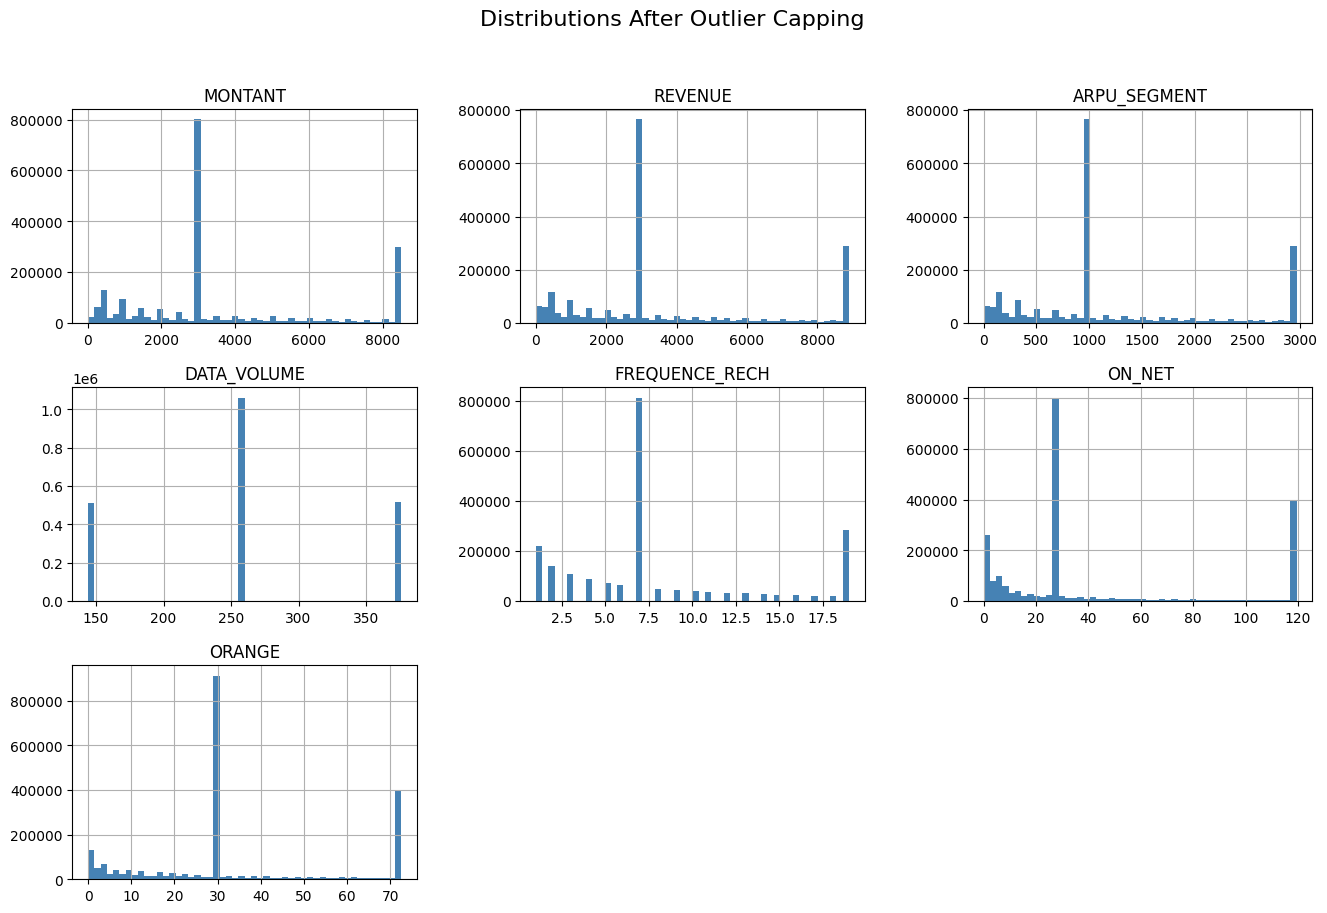

In [14]:
df[num_cols].hist(figsize=(16, 10), bins=50, color="steelblue")
plt.suptitle("Distributions After Outlier Capping", fontsize=16)
plt.show()

## Encode categorical features

In [15]:
# Encode 'MRG' column (Binary)
df["MRG"] = df["MRG"].map({"YES": 1, "NO": 0})

# Encode 'TENURE' column (ordinal)
tenure_map = {
    "A < 1 month": 1,
    "B 1-3 month": 2,
    "C 4-6 month": 3,
    "D 7-9 month": 4,
    "E 10-12 month": 5,
    "F 13-15 month": 6,
    "G 16-18 month": 7,
    "H 19-21 month": 8,
    "I 18-21 month": 8,
    "J 22-24 month": 9,
    "K > 24 month": 10
}
df["TENURE"] = df["TENURE"].map(tenure_map)

In [16]:
# Frequency encoding
region_freq = df["REGION"].value_counts(normalize=True)
df["REGION_FE"] = df["REGION"].map(region_freq)
df.drop("REGION", axis=1, inplace=True)

# Frequency encode top packs
top_pack_freq = df["TOP_PACK"].value_counts(normalize=True)
df["TOP_PACK_FE"] = df["TOP_PACK"].map(top_pack_freq)
df.drop("TOP_PACK", axis=1, inplace=True)

In [17]:
df.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,FREQ_TOP_PACK,CHURN,REGION_FE,TOP_PACK_FE
0,10.0,4250.0,15.0,4251.0,1417.0,17.0,144.0,119.5,46.0,0,54,8.0,0,0.016547,0.070702
1,8.0,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,0,4,0.0,1,0.394280,0.419022
2,10.0,3600.0,2.0,1020.0,340.0,2.0,257.0,90.0,46.0,0,17,1.0,0,0.394280,0.008567
3,10.0,8500.0,15.0,8898.5,2966.5,18.0,376.0,41.0,72.5,0,62,11.0,0,0.238282,0.006791
4,10.0,1000.0,1.0,985.0,328.0,1.0,257.0,39.0,24.0,0,11,2.0,0,0.238282,0.031342


# Based on the previous data exploration train and test a machine learning classifier

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Re-split raw data
X = df.drop("CHURN", axis=1)
y = df["CHURN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Impute train and test separately to avoid data leakage
numeric_cols = X_train.select_dtypes(include=["float64", "int64"]).columns

imputer = SimpleImputer(strategy="median")
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92    350013
           1       0.66      0.68      0.67     80797

    accuracy                           0.87    430810
   macro avg       0.79      0.80      0.80    430810
weighted avg       0.88      0.87      0.87    430810



/Users/mohamoud/Desktop/streamlit/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
import joblib

#Save feature names in exact training order
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "/Users/mohamoud/Desktop/streamlit/expresso_churn_project/models/feature_names.pkl")

# Saving trained model into our models folder
joblib.dump(model, "/Users/mohamoud/Desktop/streamlit/expresso_churn_project/models/churn_model.pkl")

['/Users/mohamoud/Desktop/streamlit/expresso_churn_project/models/churn_model.pkl']